# Deep Learning pre-Trained example

## author: Diego Tuccillo



In [0]:
#Import Libraries

import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [3]:
ls

laptop.jpeg  sample_data/


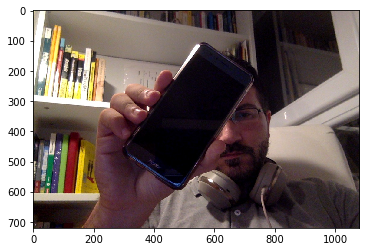

In [19]:
#import image
#image = imread('laptop.jpeg')
image = imread('photo_mine.jpeg')
plt.imshow(image)



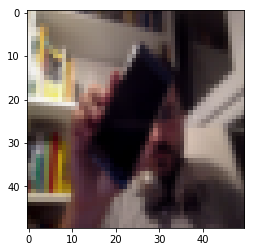

In [20]:
lowres_image = resize(image, (50, 50))
plt.imshow(lowres_image)

In [0]:
#import the preprocessed model
from keras.applications.resnet50 import preprocess_input, ResNet50

#import the model
model = ResNet50(weights='imagenet')

In [22]:
#PREPROCESSING OF THE IMAGE
#look at dimentions
print(image.shape)

(720, 1080, 3)


In [23]:
#import keras.backend as K
#K.image_data_format()

image_224 = resize(image, (224, 224), preserve_range=True, mode='reflect')

print(image_224.shape)

image_224_batch = np.expand_dims(image_224, axis=0)
print(image_224.shape)

x = preprocess_input(image_224_batch.copy())

print (x.shape)


(224, 224, 3)
(224, 224, 3)
(1, 224, 224, 3)


In [24]:
#make predictions
preds = model.predict(x)
print (preds.shape)
print (preds[0,:3])

(1, 1000)
[6.2472512e-09 1.4152253e-07 3.7979228e-07]


In [25]:
#decode the predictions
from keras.applications.resnet50 import decode_predictions

decode_predictions(preds, top=5)


print('Predicted image labels:')
class_names, confidences = [], []
for class_id, class_name, confidence in decode_predictions(preds, top=5)[0]:
    print("    {} (synset: {}): {:0.3f}".format(class_name, class_id, confidence))

Predicted image labels:
    iPod (synset: n03584254): 0.543
    cellular_telephone (synset: n02992529): 0.107
    bookcase (synset: n02870880): 0.103
    library (synset: n03661043): 0.054
    notebook (synset: n03832673): 0.043
